In [1]:
import glob
from fastdtw import fastdtw
import h5py
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns
from skimage.transform import rescale, resize, downscale_local_mean
import scipy.stats as stats
import networkx as nx
import numpy as np
import scipy 
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt
import scipy.optimize as optim
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib
import seaborn as sns
from tqdm import tqdm
import scipy.spatial.distance as ds
sns.set()
sns.set_context("talk", font_scale = 1.5)
sns.set_style('whitegrid')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]
from scipy.io import loadmat

In [2]:
data = np.load("brains.pickle",allow_pickle = True)

In [3]:
np.shape(data)

(30, 39, 39)

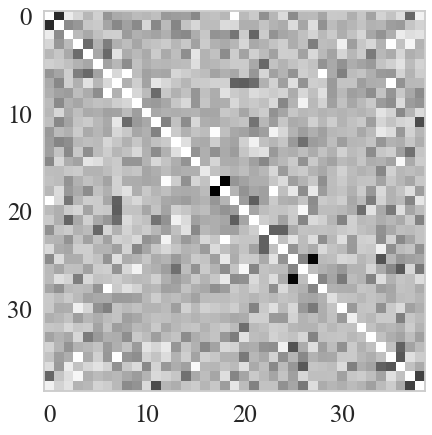

In [4]:
plt.imshow(data[1],vmax = .02,cmap = "gray")
plt.grid(False)
plt.savefig("Partial.pdf",transparent = True)

In [5]:
def euler_char(A,thresh):
    ECs = []
    A = A - np.identity(np.shape(A)[0])
    
    for t in thresh:

        M = np.array((A <= t)*1)
                
        #Number Edges
        Edges = np.sum(M)/2
        
        #Number Vertices
        Vertices = np.shape(A)[0]
        
        #Betti 1
        EC = Vertices - Edges
        
        ECs.append(EC)
        
    return ECs

In [6]:
thresh = np.linspace(0,.2,1000)

In [7]:
ECs = []

for i in tqdm(range(30)):
    ECs.append(euler_char(np.absolute(data[i,:,:]),thresh))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 72.48it/s]


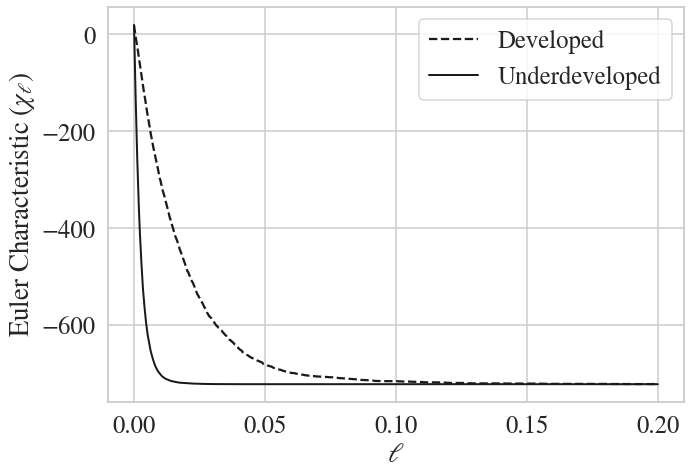

In [9]:
ECv = np.vstack(ECs)

adult = np.mean(ECs[0:6],axis = 0)
child = np.mean(ECs[6::],axis = 0)

plt.plot(thresh,adult,'--', label = "Developed",c = 'k')
plt.plot(thresh,child, label = "Underdeveloped",c = 'k', linewidth = 2)

plt.xlabel("$\ell$")

plt.ylabel(r"Euler Characteristic ($\chi_{\ell}$)")

plt.legend()

plt.tight_layout()

plt.savefig("brainb2.pdf")